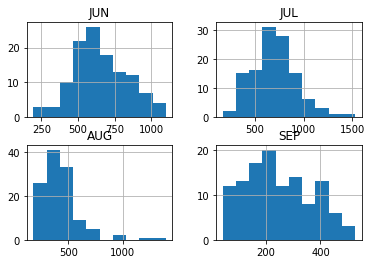

predicted chances of flood
[0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0]
actual values of floods:
87     0
89     0
30     1
102    0
81     0
38     1
15     1
42     1
105    1
92     0
11     1
21     1
46     1
37     0
39     1
31     1
48     1
2      1
91     1
117    1
66     0
74     1
110    1
12     0
Name: FLOODS, dtype: int64
Predicted chances of flood
[1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0]
Actual chances of flood
[1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0]

accuracy score: 91.666667
recall score: 84.615385
roc score: 92.307692
[1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0]
actual values:
[1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0]

accuracy score:79.166667
recall score:61.538462
roc score:80.769231

accuracy score:75.000000
recall score:61.538462
roc score:76.223776
LogisticRegression 0.9166666666666666
RandomForestClassifier 0.5
KNeighborsClassifier 0.8333333333333334
VotingClassifier 0.7916666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


  Name     Score
0  KNN  0.833333
1   LR  0.916667
2   DT  0.750000
3   RF  0.791667
4   EL  0.791667


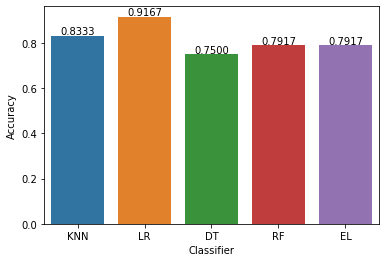

In [2]:
import numpy as np
import pandas as pd
data =  pd.read_csv('kerala.csv')
data.head()
data.apply(lambda x:sum(x.isnull()), axis=0)
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head()
x = data.iloc[:,1:14]
x.head()
y = data.iloc[:, -1]
y.head()
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()
y_train.head()
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)
print("actual values of floods:")
print(y_test)
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()
y_train.head()
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)
lr_accuracy.mean()
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)
print('Actual chances of flood')
print(y_test.values)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc
y_pred = dtc_clf.predict(x_test)
print(y_pred)
print("actual values:")
print(y_test.values)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_clf_acc
y_pred = rmf_clf.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')
voting_clf = voting.fit(x_train, y_train)
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()